## References

In [1]:
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# https://radimrehurek.com/gensim/models/ldamodel.html

## Prepare Notebook

In [2]:
# import packages
from gensim import models
import pandas as pd
import pickle
import logging
import os
from gensim import corpora, models
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Sebastian Birk\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Test Documents

In [4]:
# load district documents for first objective
with open('tokenized_documents_district_pooling.p', 'rb') as fp:
    district_pooling_docs = pickle.load(fp)

# load month documents for second objective
# this one is not used
with open('tokenized_documents_month_pooling.p', 'rb') as fp:
    month_pooling_docs = pickle.load(fp)

# load month and district documents for second objective
with open('tokenized_documents_district_per_month_pooling.p', 'rb') as fp:
    district_per_month_pooling_docs = pickle.load(fp)

## Load Model and Dictionary

In [6]:
# load model
lda_model =  models.LdaModel.load('lda_model_hashtag_pooling.model')

# load dictionary
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   print("Hashtag pooling dictionary loaded!")
else:
   print("Please train LDA model first!")

2018-10-02 18:52:56,053 : INFO : loading LdaModel object from lda_model_hashtag_pooling.model
2018-10-02 18:52:56,058 : INFO : loading expElogbeta from lda_model_hashtag_pooling.model.expElogbeta.npy with mmap=None
2018-10-02 18:52:56,061 : INFO : setting ignored attribute state to None
2018-10-02 18:52:56,065 : INFO : setting ignored attribute dispatcher to None
2018-10-02 18:52:56,066 : INFO : setting ignored attribute id2word to None
2018-10-02 18:52:56,069 : INFO : loaded lda_model_hashtag_pooling.model
2018-10-02 18:52:56,071 : INFO : loading LdaState object from lda_model_hashtag_pooling.model.state
2018-10-02 18:52:56,076 : INFO : loaded lda_model_hashtag_pooling.model.state
2018-10-02 18:52:56,085 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-10-02 18:52:56,094 : INFO : loaded tourism_hashtag_pooling.dict


Hashtag pooling dictionary loaded!


## Running Model on Test Documents

In [7]:
# apply model to district pooled documents and get topic probability distributions
district_bow_list = [dictionary.doc2bow(text) for text in district_pooling_docs]
# district_1 = district_bow_list[0] # example code
district_topic_list = []

for index in range(len(district_bow_list)):
    district_bow = district_bow_list[index]
    topic_vector = lda_model[district_bow] # get topic probability distribution for a document
    district_topic_list.append(topic_vector)

In [8]:
# display district topic list
district_topic_list

[[(0, 0.052446194),
  (1, 0.092090711),
  (2, 0.095600881),
  (3, 0.076484241),
  (4, 0.36720645),
  (5, 0.16894603),
  (6, 0.14722544)],
 [(0, 0.041791383),
  (1, 0.048468877),
  (2, 0.054324243),
  (3, 0.044436581),
  (4, 0.65305233),
  (5, 0.077019945),
  (6, 0.080906644)],
 [(0, 0.052389883),
  (1, 0.073728159),
  (2, 0.097064398),
  (3, 0.16956758),
  (4, 0.40364677),
  (5, 0.089039035),
  (6, 0.11456416)],
 [(0, 0.094074719),
  (1, 0.13107663),
  (2, 0.076947503),
  (3, 0.20856144),
  (4, 0.27622125),
  (5, 0.10695861),
  (6, 0.10615984)],
 [(0, 0.08028692),
  (1, 0.14233054),
  (2, 0.096635595),
  (3, 0.070663318),
  (4, 0.38701662),
  (5, 0.10426433),
  (6, 0.11880265)],
 [(0, 0.059831791),
  (1, 0.049774211),
  (2, 0.092794411),
  (3, 0.13154598),
  (4, 0.3390595),
  (5, 0.19269143),
  (6, 0.13430272)],
 [(0, 0.079910465),
  (1, 0.062841281),
  (2, 0.079290323),
  (3, 0.086281672),
  (4, 0.40750912),
  (5, 0.087382466),
  (6, 0.1967847)],
 [(0, 0.084721953),
  (1, 0.090782098)

## Extract for Each Topic the Scores of the Districts

In [21]:
# initialize topic lists
topic0 = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []

# save results in topic lists
for district in range(len(district_topic_list)):
    district_dict = dict(district_topic_list[district])
    
    if 0 in district_dict.keys():
        topic0.append(district_dict[0])
    else:
        topic0.append(0)
    
    if 1 in district_dict.keys():
        topic1.append(district_dict[1])
    else:
        topic1.append(0)
    
    if 2 in district_dict.keys():
        topic2.append(district_dict[2])
    else:
        topic2.append(0)
        
    if 3 in district_dict.keys():
        topic3.append(district_dict[3])
    else:
        topic3.append(0)
        
    if 4 in district_dict.keys():
        topic4.append(district_dict[4])
    else:
        topic4.append(0)
        
    if 5 in district_dict.keys():
        topic5.append(district_dict[5])
    else:
        topic5.append(0)
    
    if 6 in district_dict.keys():
        topic6.append(district_dict[6])
    else:
        topic6.append(0)

In [10]:
# check topic 0 to see whether the output looks as desired
topic0

[0.052446194,
 0.041791383,
 0.052389883,
 0.094074719,
 0.08028692,
 0.059831791,
 0.079910465,
 0.084721953,
 0.047174171,
 0.050088074]

In [11]:
# define function to plot a graph to compare districts for a given topic
def district_bar_graph(districts, indices):
    """
    Function to plot district bar graph.
    
    districts: list with topic scores for each district
    indices: list of district number
    """
    assert len(districts) == len(indices)
    n = len(districts)
    x = np.arange(n)
    plt.figure(figsize=(10,7))
    plt.bar(x, districts, width=0.5, tick_label=indices, align='center')
    plt.xlabel('District')
    plt.ylabel('Topic Score')

## Topic 0: Sightseeing

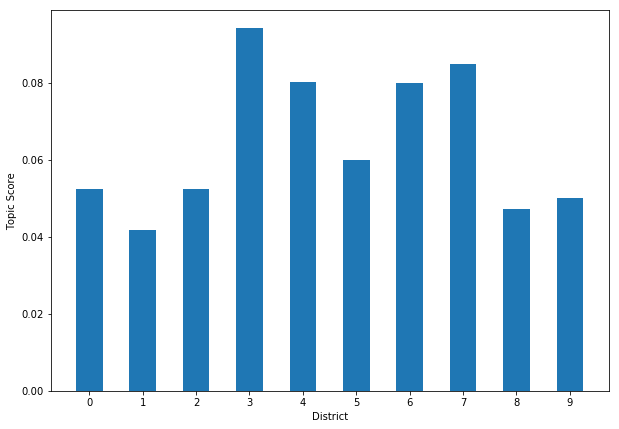

In [12]:
# plot topic scores
district_bar_graph(topic0,
                   list(range(len(topic0))))
plt.show()

## Topic 1: Summer, Sun & Friends

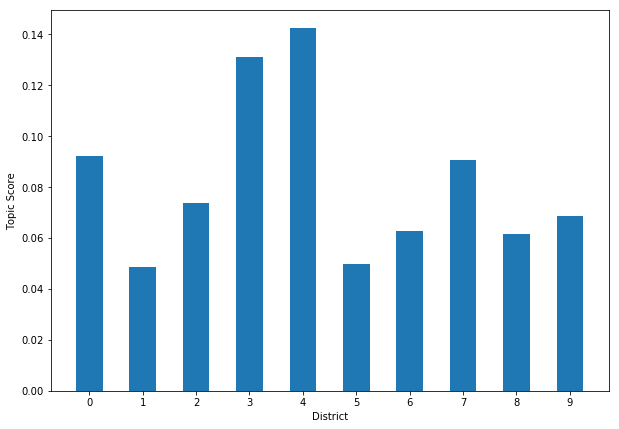

In [13]:
# plot topic scores
district_bar_graph(topic1,
                   list(range(len(topic1))))
plt.show()

## Topic 2: Streetart

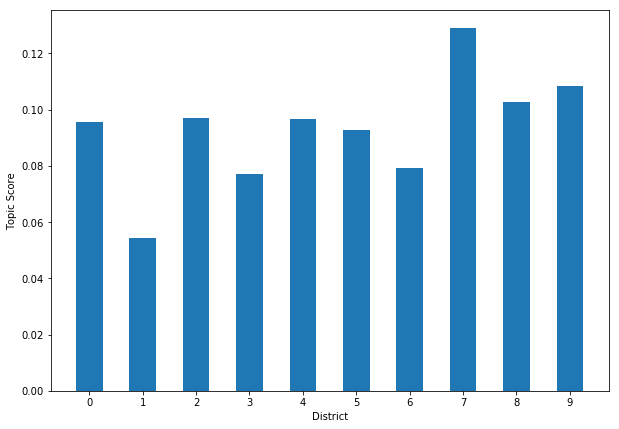

In [14]:
# plot topic scores
district_bar_graph(topic2,
                   list(range(len(topic2))))
plt.show()

## Topic 3: Everyday Life

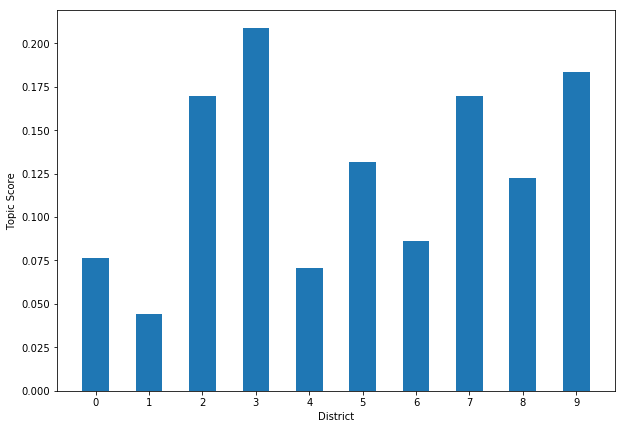

In [15]:
# plot topic scores
district_bar_graph(topic3,
                   list(range(len(topic3))))
plt.show()

## Topic 4: Lifestyle & Culture

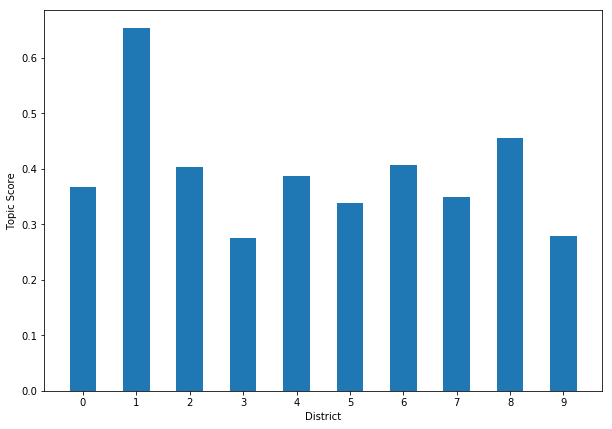

In [16]:
# plot topic scores
district_bar_graph(topic4,
                   list(range(len(topic4))))
plt.show()

## Topic 5: Nightlife

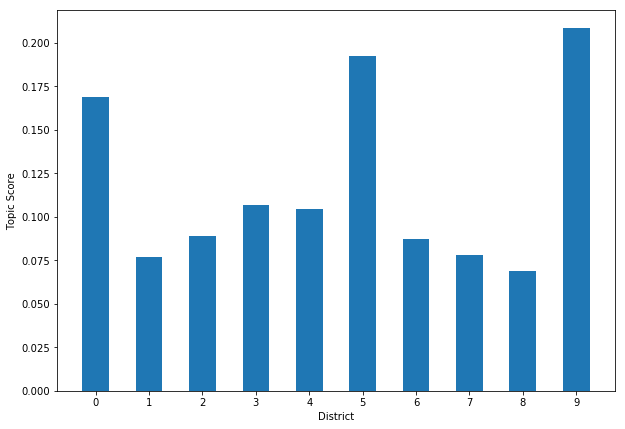

In [17]:
# plot topic scores
district_bar_graph(topic5,
                   list(range(len(topic5))))
plt.show()

## Topic 6: Sports, Health & Image

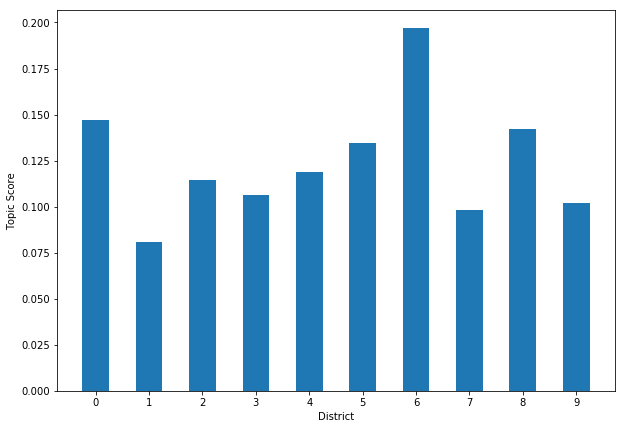

In [18]:
# plot topic scores
district_bar_graph(topic6,
                   list(range(len(topic6))))
plt.show()

## Combine Results into a Dataframe

In [19]:
# create districts dataframe
dictionary_districts = {"district": ["01","02","03","04","05","06","07","08","09","10"],
              "topic0": topic0,
              "topic1": topic1,
              "topic2": topic2,
              "topic3": topic3,
              "topic4": topic4,
              "topic5": topic5,
              "topic6": topic6}
districts = pd.DataFrame(dictionary_districts)

In [22]:
# ignore this part

# display dataframe and set index
# districts.set_index("district")

## Save Results to a CSV File

In [23]:
# ignore this part! (not necessary, is now done in the R script instead!)

# Ensure that excel will not delete leading 0s
# districts.district = districts.district.apply('"={}"'.format)
# districts.district = districts.district.apply(lambda x: str(x))

In [24]:
# display dataframe
districts

,district,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,01,0.052446,0.092091,0.095601,0.076484,0.367206,0.168946,0.147225
1,02,0.041791,0.048469,0.054324,0.044437,0.653052,0.077020,0.080907
2,03,0.052390,0.073728,0.097064,0.169568,0.403647,0.089039,0.114564
3,04,0.094075,0.131077,0.076948,0.208561,0.276221,0.106959,0.106160
4,05,0.080287,0.142331,0.096636,0.070663,0.387017,0.104264,0.118803
5,06,0.059832,0.049774,0.092794,0.131546,0.339060,0.192691,0.134303
6,07,0.079910,0.062841,0.079290,0.086282,0.407509,0.087382,0.196785
7,08,0.084722,0.090782,0.128908,0.169783,0.349451,0.078087,0.098267
8,09,0.047174,0.061592,0.102585,0.122495,0.455181,0.069069,0.141904
9,10,0.050088,0.068616,0.108290,0.183360,0.279105,0.208409,0.102132


In [25]:
districts.to_csv("districts.csv", encoding='utf-8')

## Next Part: Dynamic Analysis

In [26]:
# view district per month docs
district_per_month_pooling_docs

[['boy',
  'hurt',
  'brain',
  'gothic',
  'quarter',
  'hearbeat',
  '#boyfriend',
  '#bf',
  '#love',
  '#partners',
  '#europe',
  '#catala',
  '#adeu',
  '#gordito',
  '#cosita',
  'sensibistro',
  '#tteeturns',
  '#sydorkosinspain',
  '#pinxtosforpip',
  'best',
  'place',
  'night',
  'dinner',
  'fondaespanya',
  '#sydorkosinspain',
  '#pinxtosforpip',
  'feel',
  'engine',
  'engine',
  'pentagon',
  'moll',
  'fusta',
  'night',
  '#sunkissed',
  'gothic',
  'quarter',
  'trust',
  'experienced',
  'lady',
  'know',
  'drink',
  '#holidays',
  '#apero',
  'lunchtime',
  'sun',
  '#goodafternoon',
  '#craftbeer',
  'blacklabbcn',
  'playa',
  'barceloneta',
  'street',
  'photographer',
  'gothic',
  'quarter',
  'cmònec',
  'ramon',
  'cuberta',
  'atelier',
  'exited',
  'premiere',
  'shokobcn',
  'catch',
  'thursday',
  'june',
  '#shoko',
  '#shokobarcelona',
  'summer',
  '#me',
  '#myself',
  '#mood',
  '#moodday',
  '#thisplace',
  '#missme',
  '#espagne',
  'sand',
 

In [28]:
# delete last 2 docs (december)
del(district_per_month_pooling_docs[-1])
del(district_per_month_pooling_docs[-1])
len(district_per_month_pooling_docs)

60

In [29]:
# define function to apply the model to unseen documents (similar procedure to above where it was applied to the district docs)
def run_lda_on_test_doc(docs):
    bow_list = [dictionary.doc2bow(text) for text in docs]
    topic_list = []
    
    for index in range(len(bow_list)):
        bow = bow_list[index]
        topic_vec = lda_model[bow]
        topic_list.append(topic_vec)
        
    return topic_list

In [30]:
# apply the model on dynamic data
# topics_month = run_lda_on_test_doc(month_pooling_docs)
topics_district_per_month = run_lda_on_test_doc(district_per_month_pooling_docs)

In [31]:
# display district per month topic list
topics_district_per_month

[[(0, 0.044366464),
  (1, 0.061251059),
  (2, 0.099078745),
  (3, 0.068957314),
  (4, 0.36636451),
  (5, 0.25630867),
  (6, 0.1036732)],
 [(0, 0.041786052),
  (1, 0.053091906),
  (2, 0.076913379),
  (3, 0.056908067),
  (4, 0.63191766),
  (5, 0.074439704),
  (6, 0.064943202)],
 [(0, 0.037447397),
  (2, 0.20876357),
  (3, 0.23744458),
  (4, 0.21951687),
  (5, 0.1454431),
  (6, 0.1415455)],
 [(0, 0.020711076),
  (1, 0.081662014),
  (2, 0.056236506),
  (3, 0.38438416),
  (4, 0.066737674),
  (5, 0.18328816),
  (6, 0.20698041)],
 [(0, 0.074042358),
  (1, 0.076420031),
  (2, 0.088062361),
  (3, 0.076952256),
  (4, 0.35956568),
  (5, 0.17709234),
  (6, 0.14786498)],
 [(0, 0.0478907),
  (2, 0.10513803),
  (3, 0.15869835),
  (4, 0.36988983),
  (5, 0.2773146),
  (6, 0.031541932)],
 [(0, 0.15265858),
  (1, 0.04008048),
  (2, 0.12185612),
  (4, 0.46645892),
  (5, 0.014625191),
  (6, 0.19790699)],
 [(0, 0.21168651), (3, 0.31964982), (4, 0.39226431), (6, 0.073195219)],
 [(4, 0.64581633), (5, 0.169049

In [34]:
# initialize lists for topics
md_topic0 = []
md_topic1 = []
md_topic2 = []
md_topic3 = []
md_topic4 = []
md_topic5 = []
md_topic6 = []

# store results in topic lists
for month_district in range(len(topics_district_per_month)):
    district_month_dict = dict(topics_district_per_month[month_district])
    
    if 0 in district_month_dict.keys():
        md_topic0.append(district_month_dict[0])
    else:
        md_topic0.append(0)
    
    if 1 in district_month_dict.keys():
        md_topic1.append(district_month_dict[1])
    else:
        md_topic1.append(0)
    
    if 2 in district_month_dict.keys():
        md_topic2.append(district_month_dict[2])
    else:
        md_topic2.append(0)
        
    if 3 in district_month_dict.keys():
        md_topic3.append(district_month_dict[3])
    else:
        md_topic3.append(0)
        
    if 4 in district_month_dict.keys():
        md_topic4.append(district_month_dict[4])
    else:
        md_topic4.append(0)
        
    if 5 in district_month_dict.keys():
        md_topic5.append(district_month_dict[5])
    else:
        md_topic5.append(0)
    
    if 6 in district_month_dict.keys():
        md_topic6.append(district_month_dict[6])
    else:
        md_topic6.append(0)

In [35]:
# prepare lists with 'index'
district_list = ["01","02","03","04","05","06","07","08","09","10"] * 6
month_list = ["06"] * 10 + ["07"] * 10 + ["08"] * 10 + ["09"] * 10 + ["10"] * 10 + ["11"] * 10

In [36]:
# create districts per month dataframe
md_dictionary = {"district": district_list,
              "month": month_list,
              "topic0": md_topic0,
              "topic1": md_topic1,
              "topic2": md_topic2,
              "topic3": md_topic3,
              "topic4": md_topic4,
              "topic5": md_topic5,
              "topic6": md_topic6}
month_districts = pd.DataFrame(md_dictionary)

In [37]:
# display districts per month dataframe
month_districts

,district,month,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,01,06,0.044366,0.061251,0.099079,0.068957,0.366365,0.256309,0.103673
1,02,06,0.041786,0.053092,0.076913,0.056908,0.631918,0.074440,0.064943
2,03,06,0.037447,0.000000,0.208764,0.237445,0.219517,0.145443,0.141546
3,04,06,0.020711,0.081662,0.056237,0.384384,0.066738,0.183288,0.206980
4,05,06,0.074042,0.076420,0.088062,0.076952,0.359566,0.177092,0.147865
5,06,06,0.047891,0.000000,0.105138,0.158698,0.369890,0.277315,0.031542
6,07,06,0.152659,0.040080,0.121856,0.000000,0.466459,0.014625,0.197907
7,08,06,0.211687,0.000000,0.000000,0.319650,0.392264,0.000000,0.073195
8,09,06,0.000000,0.000000,0.000000,0.000000,0.645816,0.169049,0.175504
9,10,06,0.040087,0.084793,0.124080,0.159790,0.259212,0.197681,0.134357


## Save Results to a CSV File

In [38]:
month_districts.to_csv("month_districts.csv", encoding='utf-8')

In [39]:
# verify results
topics_district_per_month[10] # month 7, district 1

[(0, 0.049182747),
 (1, 0.11197082),
 (2, 0.086070046),
 (3, 0.058652479),
 (4, 0.40836591),
 (5, 0.13463441),
 (6, 0.15112357)]

In [40]:
# verify results
district_per_month_pooling_docs[10] # month 7, district 1

['#beautifulmemories',
 '#artdirector',
 '#lovetravel',
 '#inspiration',
 '#beautifulcity',
 'free',
 'water',
 '#goticquarterbarcelona',
 '#photography',
 '#traveltheworld',
 'gothic',
 'quarter',
 'new',
 'friend',
 "can't",
 'enough',
 'tapa',
 'sangria',
 'maryland',
 'gothic',
 'quarter',
 'beautiful',
 'summer',
 'flower',
 'feliz',
 'sabado',
 '#weekendvibes',
 'gothic',
 'quarter',
 '#retratos',
 '#portraits',
 'gothic',
 'quarter',
 'oops',
 '#byebyebarcelona',
 '#happytimes',
 'mr',
 'robinson',
 'minus',
 'goat',
 'cheese',
 'barrio',
 'gótico',
 'haunting',
 'history',
 'present',
 'see',
 'city',
 '#mojitos',
 'mighty',
 '#cocktails',
 'mojito',
 'rock',
 'beach',
 'time',
 'playa',
 'barceloneta',
 'chicas',
 'gothic',
 'quarter',
 'favorite',
 'pic',
 'stumbled',
 'upon',
 '#gothicquarterbarcelona',
 '#adios',
 'concert',
 'carillon',
 'barcelone',
 'gothic',
 'quarter',
 'addio',
 'nubilato',
 'corso',
 'ti',
 'auguro',
 'il',
 'meglio',
 'tesoro',
 '#friend',
 '#friend